# 分组

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from matplotlib import patches
from scipy.spatial import ConvexHull

## Bar


In [2]:
mpg = pl.read_csv("data/mpg.csv")
mpg.head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
str,str,f64,i64,i64,str,str,i64,i64,str,str
"""audi""","""a4""",1.8,1999,4,"""auto(l5)""","""f""",18,29,"""p""","""compact"""
"""audi""","""a4""",1.8,1999,4,"""manual(m5)""","""f""",21,29,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""manual(m6)""","""f""",20,31,"""p""","""compact"""
"""audi""","""a4""",2.0,2008,4,"""auto(av)""","""f""",21,30,"""p""","""compact"""
"""audi""","""a4""",2.8,1999,6,"""auto(l5)""","""f""",16,26,"""p""","""compact"""


In [3]:
mpg_group = (
    mpg[:, ["cty", "manufacturer"]].group_by("manufacturer").mean().sort(by="cty")
)
mpg_group.head()

manufacturer,cty
str,f64
"""lincoln""",11.333333
"""land rover""",11.5
"""dodge""",13.135135
"""mercury""",13.25
"""jeep""",13.5


[(0.0, 30.0),
 Text(0, 0.5, 'Miles Per Gallon'),
 Text(0.5, 1.0, 'Bar Chart for Highway Mileage')]

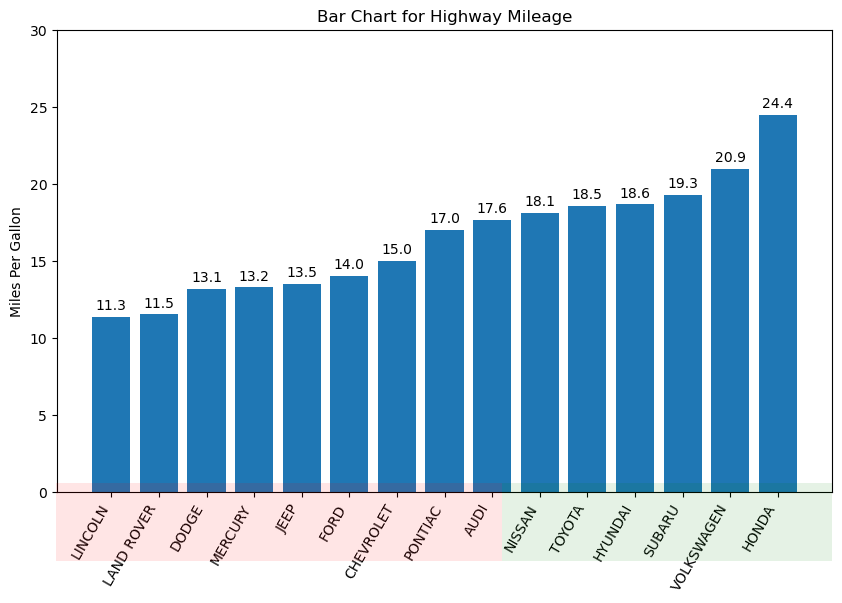

In [4]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

x = mpg_group["manufacturer"].str.to_uppercase()
y = mpg_group["cty"]

ax.bar(x=x, height=y)

for i, cty in enumerate(y):
    ax.text(i, cty + 0.5, round(cty, 1), horizontalalignment="center")

p1 = patches.Rectangle(
    (0.57, -0.005),
    width=0.33,
    height=0.13,
    alpha=0.1,
    facecolor="green",
    transform=fig.transFigure,
)
p2 = patches.Rectangle(
    (0.124, -0.005),
    width=0.446,
    height=0.13,
    alpha=0.1,
    facecolor="red",
    transform=fig.transFigure,
)
fig.add_artist(p1)
fig.add_artist(p2)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment="right")
ax.set(ylim=(0, 30), ylabel="Miles Per Gallon", title="Bar Chart for Highway Mileage")

## Dendrogram


In [5]:
from scipy.cluster import hierarchy

In [6]:
arrests = pl.read_csv("data/us_arrests.csv")
arrests.head()

Murder,Assault,UrbanPop,Rape,State
f64,i64,i64,f64,str
13.2,236,58,21.2,"""Alabama"""
10.0,263,48,44.5,"""Alaska"""
8.1,294,80,31.0,"""Arizona"""
8.8,190,50,19.5,"""Arkansas"""
9.0,276,91,40.6,"""California"""


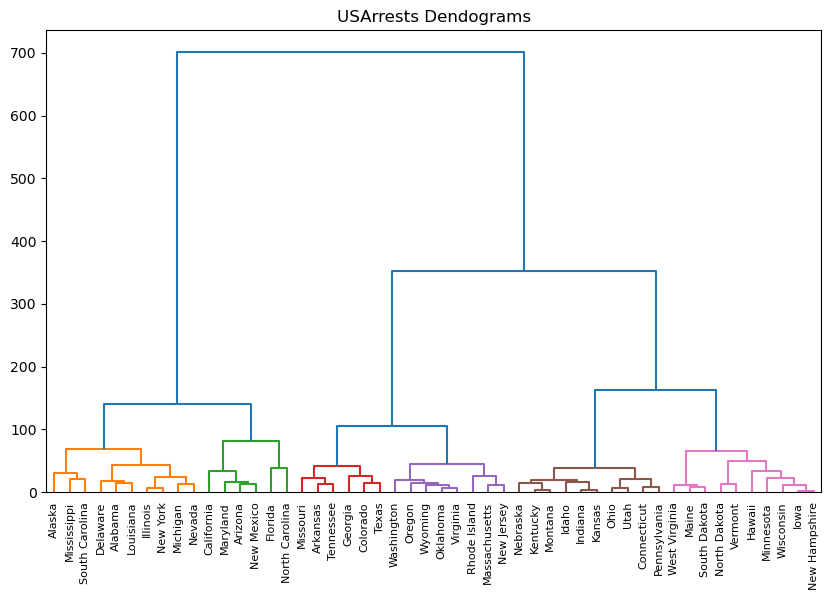

In [7]:
_, ax = plt.subplots(figsize=(10, 6))

dend = hierarchy.dendrogram(
    hierarchy.linkage(
        arrests[["Murder", "Assault", "UrbanPop", "Rape"]], method="ward"
    ),
    labels=arrests["State"].to_numpy(),
    color_threshold=100,
)

ax.set(title="USArrests Dendograms")
plt.show()

## Encircling

In [8]:
midwest = pl.read_csv("data/midwest_filter.csv")
midwest.with_columns(
    popdensity=midwest["poptotal"] / 100, state=midwest["state"].cast(pl.Categorical)
)
midwest.head()

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
i64,str,str,f64,i64,f64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,f64,i64,str,f64
561,"""ADAMS""","""IL""",0.052,66090,1270.96154,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,"""AAR""",250.944411
562,"""ALEXANDER""","""IL""",0.014,10626,759.0,7054,3496,19,48,9,66.38434,32.900433,0.1788067,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,"""LHR""",185.78126
563,"""BOND""","""IL""",0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.85209,12.69741,0,"""AAR""",175.905385
564,"""BOONE""","""IL""",0.017,30806,1812.11765,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.1978,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,"""ALU""",319.823487
565,"""BROWN""","""IL""",0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.23989,0.085675,0.10281,3979,68.861523,14.475999,3.36768,4815,82.50514,13.520249,13.022889,11.143211,19.2,0,"""AAR""",130.442161


In [9]:
midwest_select = midwest.filter(pl.col("state") == "IN")
midwest_select.head()

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
i64,str,str,f64,i64,f64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,f64,f64,f64,f64,i64,str,f64
663,"""ADAMS""","""IN""",0.021,31095,1480.71429,30530,36,42,60,427,98.182988,0.115774,0.13507,0.192957,1.373211,18119,74.397042,16.11568,4.862299,30490,98.05435,11.636602,17.194524,9.101888,8.714027,1,"""AAU""",277.642023
665,"""BARTHOLOMEW""","""IN""",0.022,63657,2893.5,61774,1005,97,610,171,97.041959,1.578774,0.152379,0.958261,0.268627,41218,76.903295,22.846815,6.844097,62784,98.628588,8.545171,10.736855,6.99242,10.811943,0,"""AAR""",457.463283
666,"""BENTON""","""IN""",0.024,9441,393.375,9389,6,16,1,29,99.449211,0.063553,0.169474,0.0105921,0.307171,6053,77.085743,13.464398,4.014538,9300,98.506514,8.043011,8.349218,6.842329,10.502283,0,"""AAR""",139.24402
667,"""BLACKFORD""","""IN""",0.01,14067,1406.7,13978,7,44,16,22,99.367314,0.049762,0.3127888,0.113741,0.1563944,9259,72.988444,12.981963,4.428124,13903,98.834151,9.853988,12.323745,8.332247,10.9375,0,"""AAR""",268.221385
668,"""BOONE""","""IN""",0.024,38147,1589.45833,37814,83,90,94,66,99.127061,0.217579,0.235929,0.246415,0.173015,24915,82.468393,27.830624,8.813967,37402,98.047029,6.296455,8.021754,5.239599,7.089425,1,"""HLU""",291.48311


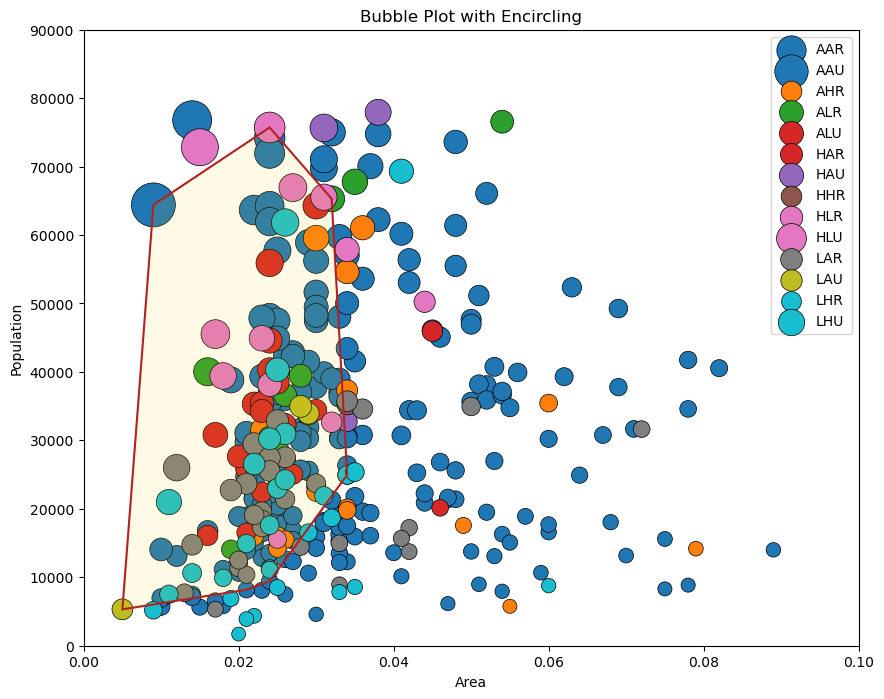

In [10]:
_, ax = plt.subplots(figsize=(10, 8))

categories = np.unique(midwest["category"])
colors = [plt.cm.tab10(i / float(len(categories) - 1)) for i in range(len(categories))]

for i, category in enumerate(categories):
    plt.scatter(
        "area",
        "poptotal",
        data=midwest.filter(pl.col("category") == category),
        s="dot_size",
        color=colors[i],
        label=str(category),
        edgecolors="black",
        linewidths=0.5,
    )


# Encircling
def encircle(x, y, ax=None, **kw):
    ax = ax or plt.gca()
    p = np.stack([x, y], axis=1)
    hull = ConvexHull(p)
    poly = patches.Polygon(xy=p[hull.vertices, :], closed=True, **kw)
    ax.add_patch(poly)


ax.set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
    xlabel="Area",
    ylabel="Population",
    title="Bubble Plot with Encircling",
)

x = midwest_select["area"]
y = midwest_select["poptotal"]

# Draw polygon surrounding vertices
encircle(x, y, ec="k", fc="gold", alpha=0.1, ax=ax)
encircle(x, y, ec="firebrick", fc="none", lw=1.5, ax=ax)
ax.legend()